<a href="https://colab.research.google.com/github/andidprastyo/PCVK_Ganjil_2023/blob/main/week%2011/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import cv2
import os
import matplotlib.pyplot as plt

### Load Image

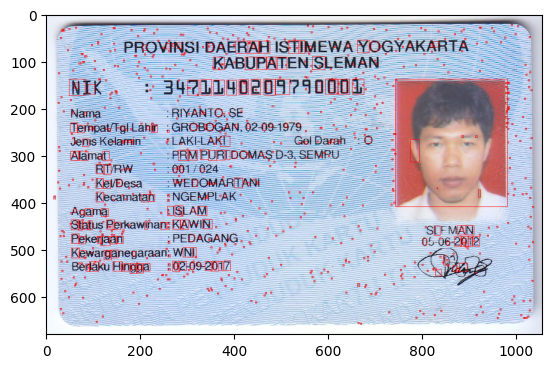

In [19]:
img = cv2.imread('/content/drive/MyDrive/KTP_More/ktp4.png')

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Lokalisasi

In [14]:
path_plate = './drive/MyDrive/KTP_More'

for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

In [15]:
# List untuk menyimpan nama file di direktori
file_names = []

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    # Mendapatkan path lengkap file
    file_path = os.path.join(path_plate, name_file)

    # Membaca gambar dari file
    src = cv2.imread(file_path)

    # Operasi lain yang ingin Anda lakukan pada gambar
    blurred = src.copy()
    gray = blurred.copy()

    # Menambahkan nama file ke dalam list
    file_names.append(name_file)

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file:", file_name)

Nama file: KTP7.jpeg
Nama file: ktp.png
Nama file: ktp1.png
Nama file: ktp2.png
Nama file: ktp3.png
Nama file: ktp4.png
Nama file: ktp5.png
Nama file: ktp6.png


#### Gaussian Blur

In [8]:
for i in range(10):
  blurred = cv.GaussianBlur(img, (5,5), 0.5)

#### Grayscaling

158.0 (636, 996)


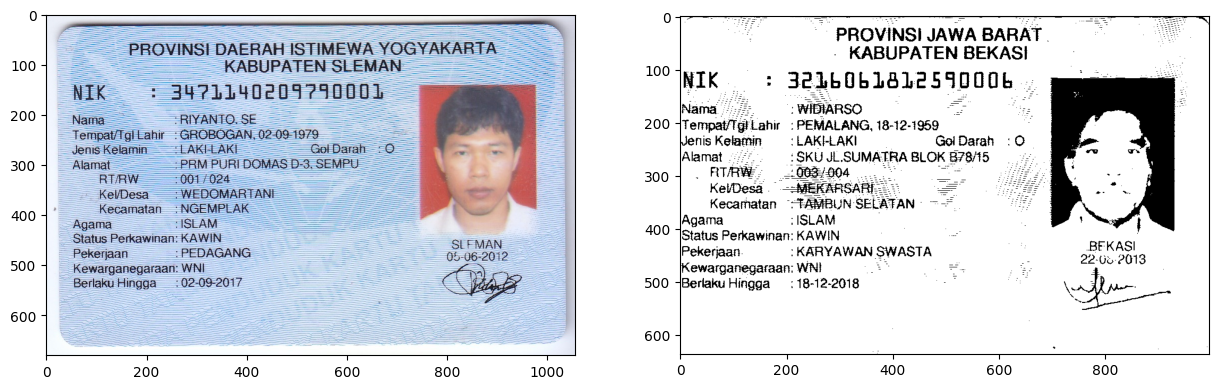

In [16]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

#### Implement morphologies to each images

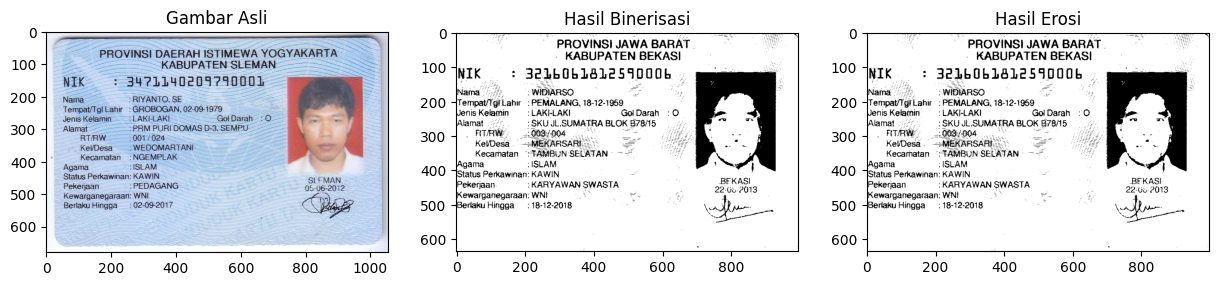

In [17]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()


#### Contour Extraction

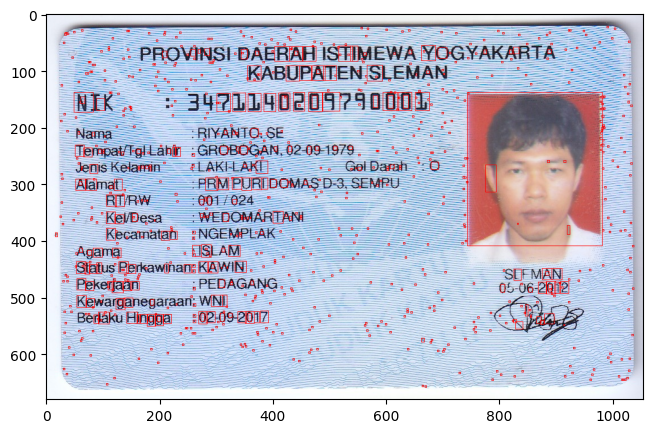

In [18]:
blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))